# Importação das bibliotecas

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Importação da base de dados


In [2]:
df = pd.read_excel("/kaggle/input/dados-neura-net-tcc/Geral.xlsx", sheet_name="WEGE3_GERAL")

In [3]:
display(df)

,Year,Quarter,IPCA,PIB,Dolar,Receita,Lucro Líquido,Preco
0,2000,1,1600.970000,92308.966667,1.773683,164,25,0.112082
1,2000,2,1612.093333,97596.200000,1.802977,199,36,0.104688
2,2000,3,1656.220000,102965.266667,1.814853,209,41,0.112647
3,2000,4,1675.110000,106826.900000,1.929469,226,42,0.127454
4,2001,1,1700.416667,104156.600000,2.015995,222,35,0.132572
...,...,...,...,...,...,...,...,...
87,2021,4,6071.413333,769850.966667,5.586013,6540,895,35.334567
88,2022,1,6228.086667,771902.866667,5.229929,6828,954,30.517429
89,2022,2,6417.203333,823945.800000,4.926561,7185,928,27.528312
90,2022,3,6390.386667,847881.566667,5.246172,7911,1176,28.594781


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           92 non-null     int64  
 1   Quarter        92 non-null     int64  
 2   IPCA           92 non-null     float64
 3   PIB            92 non-null     float64
 4   Dolar          92 non-null     float64
 5   Receita        92 non-null     int64  
 6   Lucro Líquido  92 non-null     int64  
 7   Preco          92 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 5.9 KB


In [5]:
df.describe()

,Year,Quarter,IPCA,PIB,Dolar,Receita,Lucro Líquido,Preco
count,92.000000,92.00000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,2011.000000,2.50000,3589.902246,378412.847101,2.900927,1960.000000,264.532609,6.693845
std,6.669596,1.12416,1362.796875,208365.740983,1.137352,1834.720891,266.123885,10.180465
min,2000.000000,1.00000,1600.970000,92308.966667,1.596245,164.000000,25.000000,0.104688
25%,2005.000000,1.75000,2515.195833,184639.175000,2.011409,649.250000,106.000000,0.831342
50%,2011.000000,2.50000,3325.011667,366315.650000,2.520884,1306.000000,163.500000,2.365031
75%,2017.000000,3.25000,4814.979167,543767.841667,3.515214,2462.750000,290.750000,6.119477
max,2022.000000,4.00000,6438.740000,847881.566667,5.586013,7979.000000,1221.000000,39.068699


## Limpeza dos dados


<Axes: >

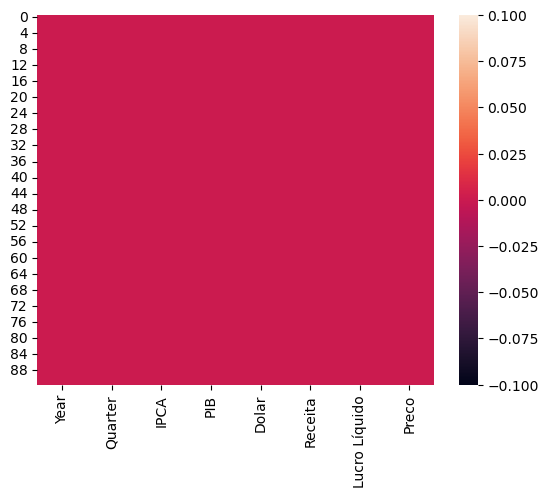

In [6]:
sns.heatmap(df.isnull())

In [7]:
df = df.drop(labels = ['Year','Quarter'], axis=1)

In [8]:
#IPCA, PIB E RECEITA FORAM EXCLUÍDOS POIS NÃO PASSARAM NO TESTE
all_columns = ['Dolar','Lucro Líquido']
# TODOS PASSARAM
macro_columns = ['IPCA', 'PIB', 'Dolar']
#RECEITA NÃO PASSOU NO TESTE T
finance_columns = ['Lucro Líquido']

In [9]:
#padronizando o dataframe para o algoritmo conseguir ter um aprendizado melhor
padronizadorxall = StandardScaler()
padronizadoryall = StandardScaler()
dfstandardxall = df[all_columns]
dfstandardyall = df['Preco']
dfstandardyall = dfstandardyall.to_numpy()
dfstandardyall = dfstandardyall.reshape(-1,1)
x_standardall = padronizadorxall.fit_transform(dfstandardxall)
y_standardall = padronizadoryall.fit_transform(dfstandardyall)

In [10]:
padronizadorxfin = StandardScaler()
padronizadoryfin = StandardScaler()
dfstandardxfin = df[finance_columns]
dfstandardyfin = df['Preco']
dfstandardyfin = dfstandardyfin.to_numpy()
dfstandardyfin = dfstandardyfin.reshape(-1,1)
x_standardfin = padronizadorxfin.fit_transform(dfstandardxfin)
y_standardfin = padronizadoryfin.fit_transform(dfstandardyfin)

In [11]:
#padronizando o dataframe para o algoritmo conseguir ter um aprendizado melhor
padronizadorxmacro = StandardScaler()
padronizadorymacro = StandardScaler()
dfstandardxmacro = df[macro_columns]
dfstandardymacro = df['Preco']
dfstandardymacro = dfstandardymacro.to_numpy()
dfstandardymacro = dfstandardymacro.reshape(-1,1)
x_standardmacro = padronizadorxmacro.fit_transform(dfstandardxmacro)
y_standardmacro = padronizadorymacro.fit_transform(dfstandardymacro)

In [12]:
X_train_standardall, X_test_standardall, y_train_standardall, y_test_standardall = train_test_split(x_standardall, y_standardall, test_size=0.20, random_state=42)
X_train_standardmacro, X_test_standardmacro, y_train_standardmacro, y_test_standardmacro = train_test_split(x_standardmacro, y_standardmacro, test_size=0.20, random_state=42)
X_train_standardfin, X_test_standardfin, y_train_standardfin, y_test_standardfin = train_test_split(x_standardfin, y_standardfin, test_size=0.20, random_state=42)

# Visualização da base de dados

<Axes: title={'center': 'Dólar x Preço'}, xlabel='Dolar', ylabel='Preco'>

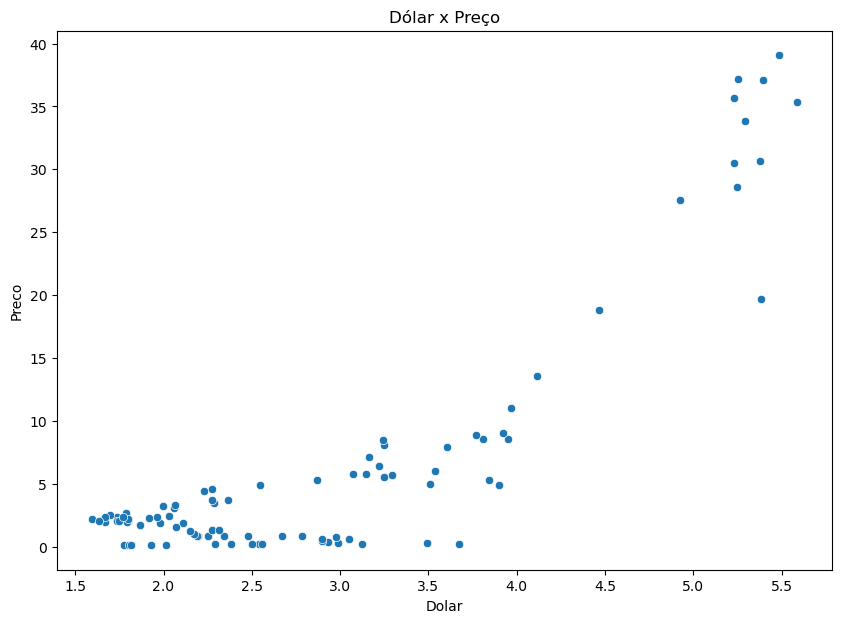

In [13]:
plt.figure(figsize=(10,7))
plt.title("Dólar x Preço")
sns.scatterplot(data=df,x=df['Dolar'], y=df['Preco'])

<Axes: title={'center': 'IPCA x Preço'}, xlabel='IPCA', ylabel='Preco'>

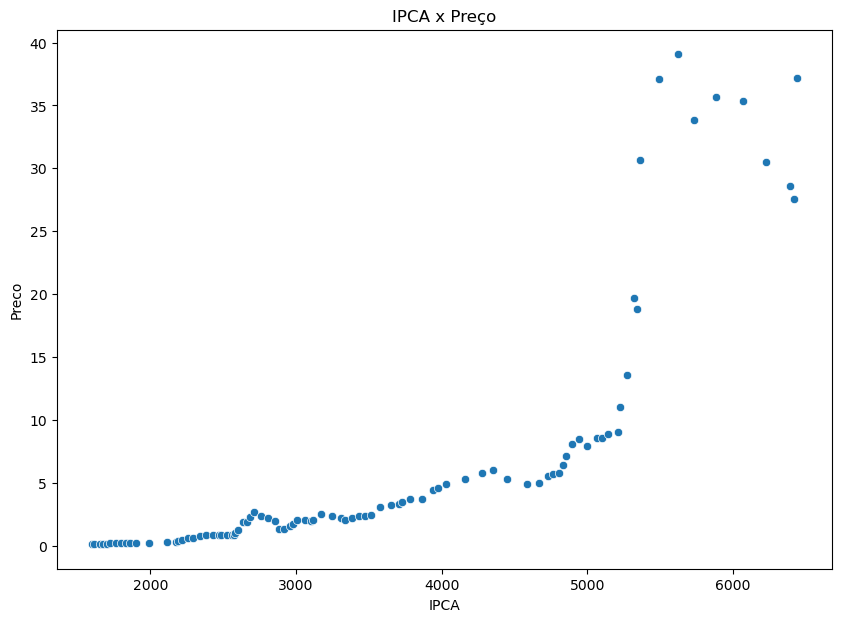

In [14]:
plt.figure(figsize=(10,7))
plt.title("IPCA x Preço")
sns.scatterplot(data=df,x=df['IPCA'], y=df['Preco'])


<Axes: title={'center': 'PIB x Preço'}, xlabel='PIB', ylabel='Preco'>

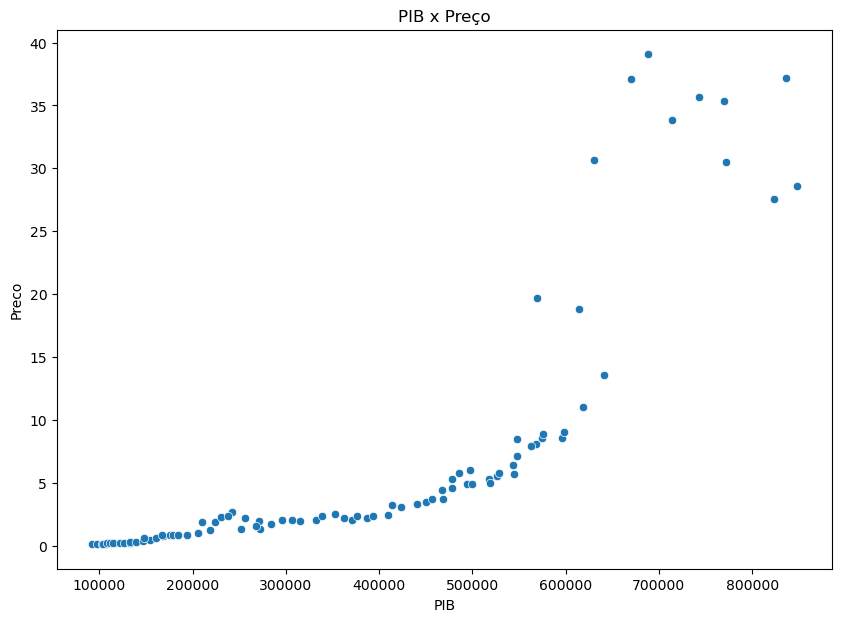

In [15]:
plt.figure(figsize=(10,7))
plt.title("PIB x Preço")
sns.scatterplot(data=df,x=df['PIB'], y=df['Preco'])

<Axes: title={'center': 'Receita Líquida x Preço'}, xlabel='Receita', ylabel='Preco'>

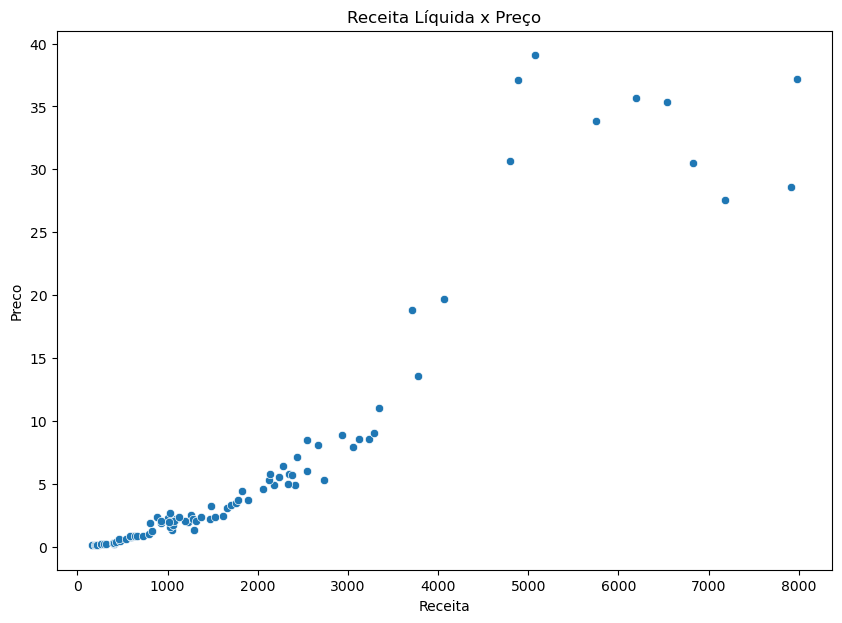

In [16]:
plt.figure(figsize=(10,7))
plt.title("Receita Líquida x Preço")
sns.scatterplot(data=df,x=df['Receita'], y=df['Preco'])

<Axes: title={'center': 'Lucro Líquido x Preço'}, xlabel='Lucro Líquido', ylabel='Preco'>

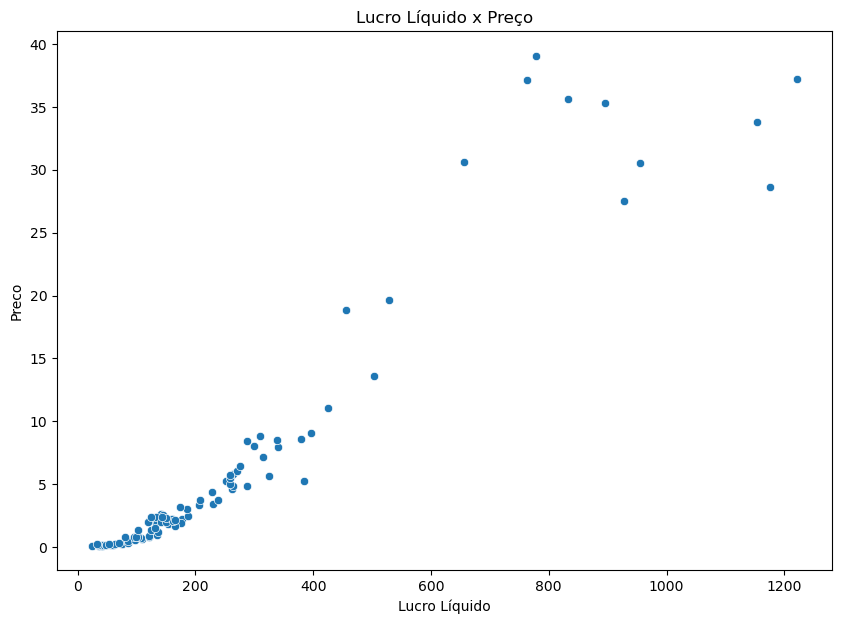

In [17]:
plt.figure(figsize=(10,7))
plt.title("Lucro Líquido x Preço")
sns.scatterplot(data=df,x=df['Lucro Líquido'], y=df['Preco'])

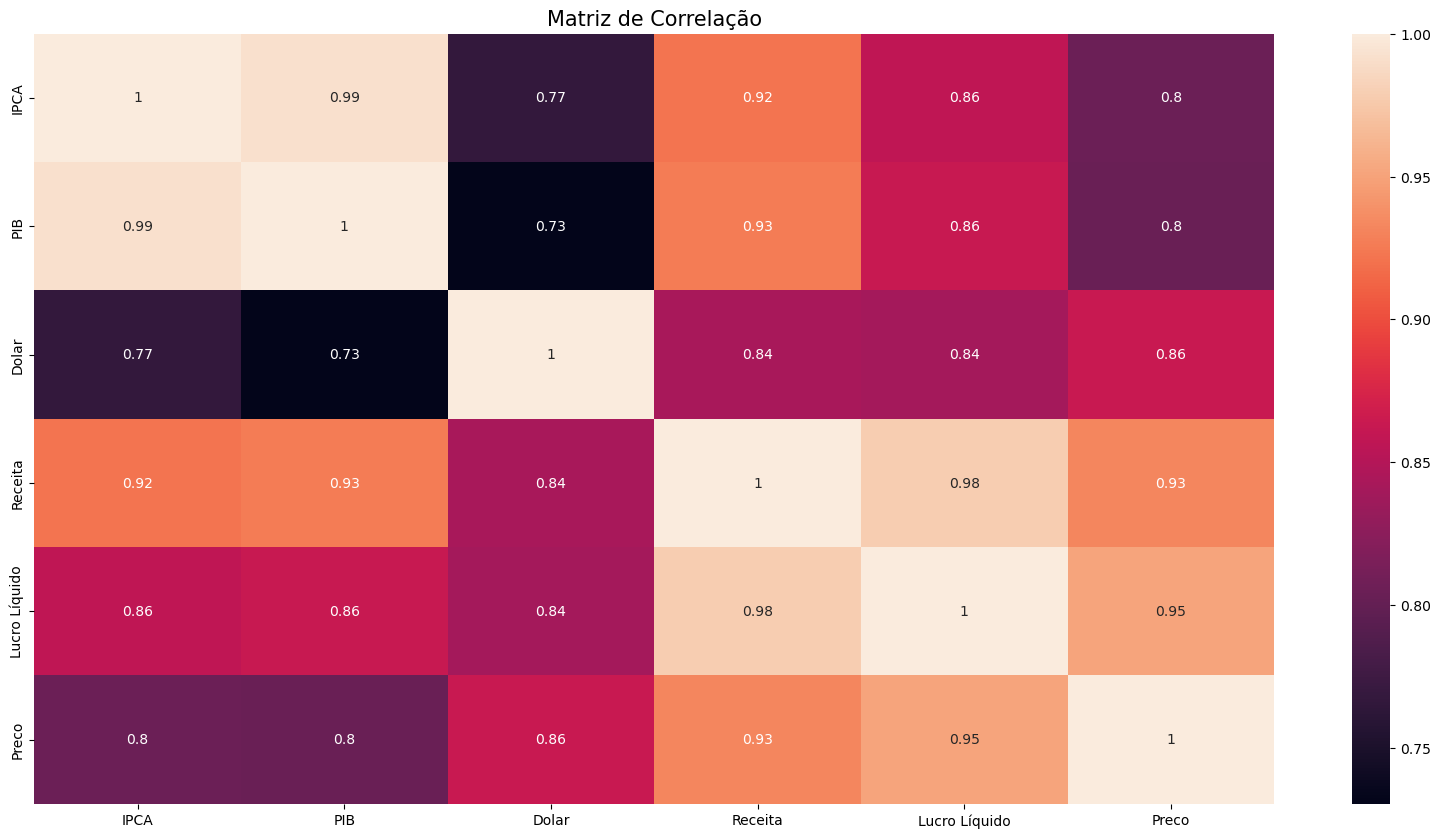

In [18]:
plt.figure(figsize=(20,10))
plt.title("Matriz de Correlação", fontdict={'fontsize':15})
sns.heatmap(df.corr(), annot = True);

<Figure size 2000x1000 with 0 Axes>

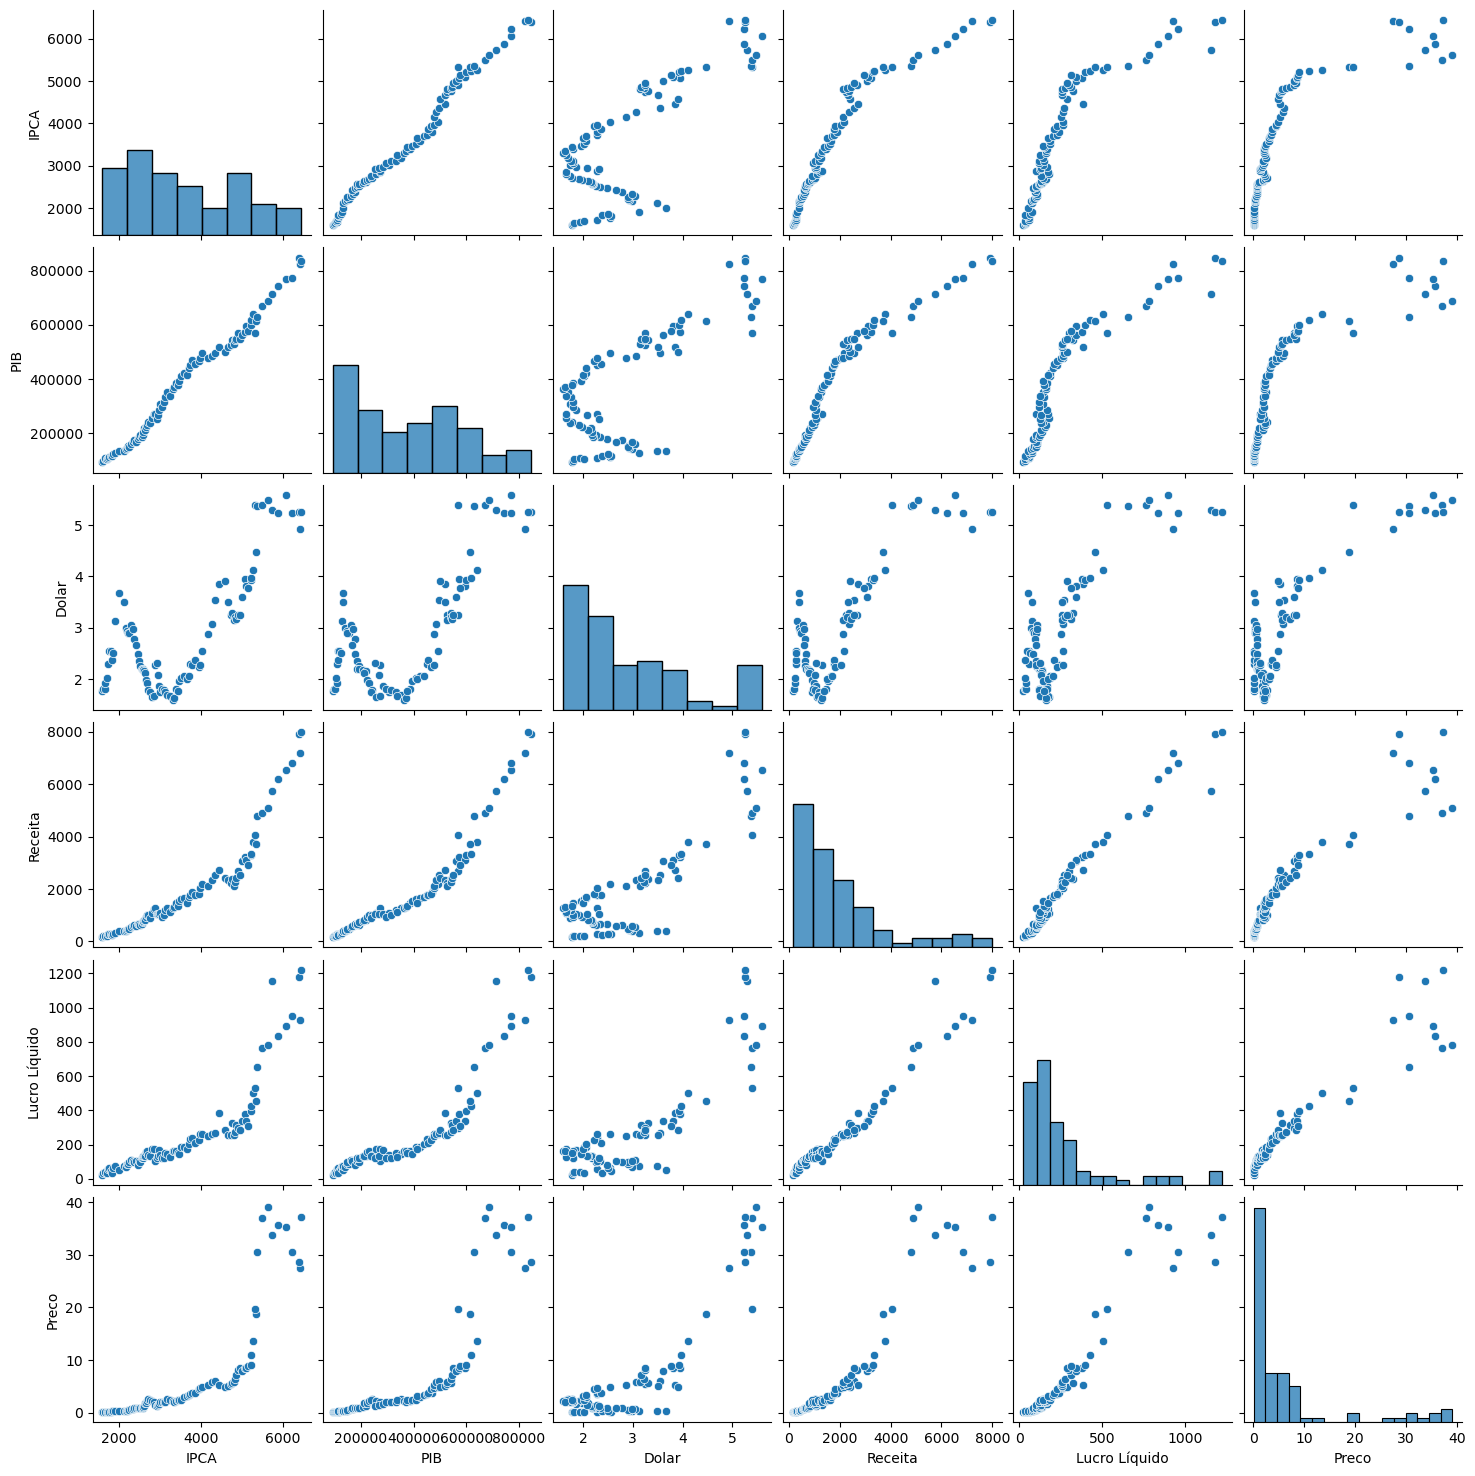

In [19]:
plt.figure(figsize=(20,10))
sns.pairplot(df)

In [20]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(input_shape = [3],units = 20, activation= 'relu'))
model1.add(tf.keras.layers.Dense(units = 20, activation= 'relu'))
model1.add(tf.keras.layers.Dense(units = 1, activation='linear'))
model1.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')
net_standard1 = model1.fit(X_train_standardmacro, y_train_standardmacro, epochs = 150)

Epoch 1/150
3/3 [==============================] - 1s 6ms/step - loss: 0.7454
Epoch 2/150
3/3 [==============================] - 0s 3ms/step - loss: 0.5898
Epoch 3/150
3/3 [==============================] - 0s 3ms/step - loss: 0.2621
Epoch 4/150
3/3 [==============================] - 0s 4ms/step - loss: 0.1611
Epoch 5/150
3/3 [==============================] - 0s 4ms/step - loss: 0.0910
Epoch 6/150
3/3 [==============================] - 0s 3ms/step - loss: 0.1039
Epoch 7/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0906
Epoch 8/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0735
Epoch 9/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 10/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0461
Epoch 11/150
3/3 [==============================] - 0s 3ms/step - loss: 0.1137
Epoch 12/150
3/3 [==============================] - 0s 3ms/step - loss: 0.1684
Epoch 13/150
3/3 [==============================] - 0s 3ms/st

In [21]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(input_shape = [1],units = 20, activation= 'relu'))
model2.add(tf.keras.layers.Dense(units = 20, activation= 'relu'))
model2.add(tf.keras.layers.Dense(units = 1, activation='linear'))
model2.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')
net_standard2 = model2.fit(X_train_standardfin, y_train_standardfin, epochs = 150)

Epoch 1/150
3/3 [==============================] - 1s 3ms/step - loss: 0.7499
Epoch 2/150
3/3 [==============================] - 0s 3ms/step - loss: 1.2298
Epoch 3/150
3/3 [==============================] - 0s 3ms/step - loss: 0.7180
Epoch 4/150
3/3 [==============================] - 0s 3ms/step - loss: 0.3220
Epoch 5/150
3/3 [==============================] - 0s 3ms/step - loss: 0.1636
Epoch 6/150
3/3 [==============================] - 0s 3ms/step - loss: 0.1186
Epoch 7/150
3/3 [==============================] - 0s 3ms/step - loss: 0.1365
Epoch 8/150
3/3 [==============================] - 0s 3ms/step - loss: 0.2083
Epoch 9/150
3/3 [==============================] - 0s 3ms/step - loss: 0.3119
Epoch 10/150
3/3 [==============================] - 0s 3ms/step - loss: 0.2710
Epoch 11/150
3/3 [==============================] - 0s 4ms/step - loss: 0.1536
Epoch 12/150
3/3 [==============================] - 0s 3ms/step - loss: 0.1871
Epoch 13/150
3/3 [==============================] - 0s 4ms/st

In [22]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(input_shape = [2],units = 20, activation= 'relu'))
model3.add(tf.keras.layers.Dense(units = 20, activation= 'relu'))
model3.add(tf.keras.layers.Dense(units = 1, activation='linear'))
model3.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')
net_standard3 = model3.fit(X_train_standardall, y_train_standardall, epochs = 150)

Epoch 1/150
3/3 [==============================] - 1s 4ms/step - loss: 0.9442
Epoch 2/150
3/3 [==============================] - 0s 3ms/step - loss: 1.2809
Epoch 3/150
3/3 [==============================] - 0s 3ms/step - loss: 0.7541
Epoch 4/150
3/3 [==============================] - 0s 3ms/step - loss: 0.2474
Epoch 5/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 6/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0861
Epoch 7/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0703
Epoch 8/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0569
Epoch 9/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 10/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0454
Epoch 11/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0509
Epoch 12/150
3/3 [==============================] - 0s 3ms/step - loss: 0.0566
Epoch 13/150
3/3 [==============================] - 0s 3ms/st

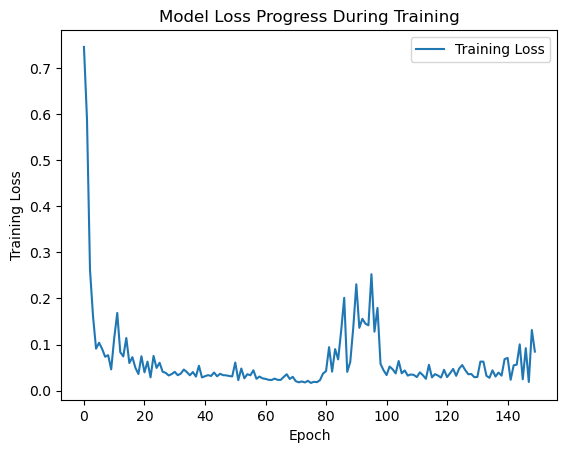

In [23]:
plt.plot(net_standard1.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

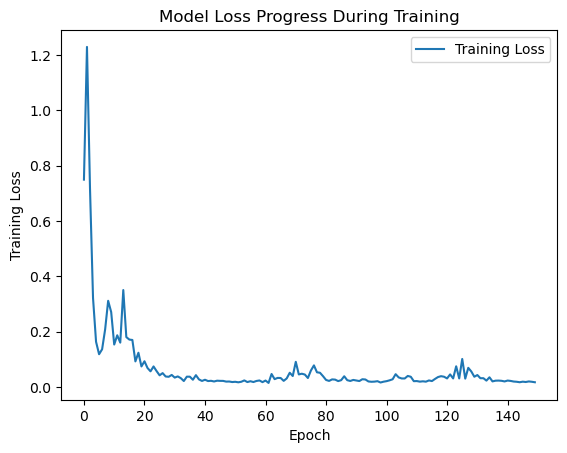

In [24]:
plt.plot(net_standard2.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

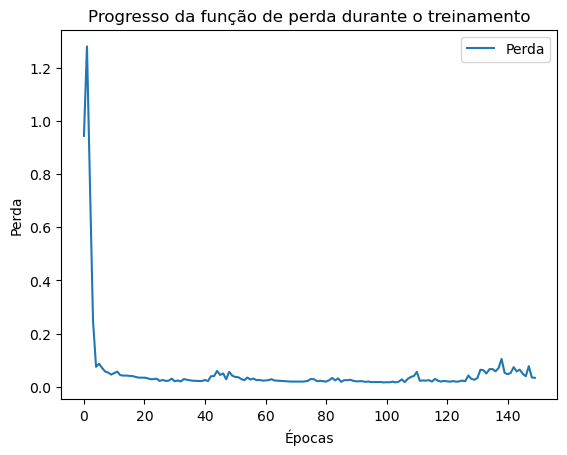

In [25]:
plt.plot(net_standard3.history['loss'])
plt.title('Progresso da função de perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Perda']);

In [26]:
teste_predict = model1.predict(X_test_standardmacro)
teste_predict = padronizadorymacro.inverse_transform(teste_predict)
df_compare = pd.DataFrame(padronizadorymacro.inverse_transform(y_test_standardmacro))
df_compare.columns = ['Y_test']
df_compare['Prediction'] = teste_predict
df_compare['Diference Between Y_test and Prediction'] = df_compare['Prediction'] - df_compare['Y_test']
df_compare['Erro quadratico'] = df_compare['Diference Between Y_test and Prediction'] * df_compare['Diference Between Y_test and Prediction']
display(df_compare['Erro quadratico'].mean())
df_compare

1/1 [==============================] - 0s 109ms/step


5.1452169600924265

,Y_test,Prediction,Diference Between Y_test and Prediction,Erro quadratico
0,2.069281,2.274798,0.205517,0.042237
1,0.810087,1.269510,0.459423,0.211070
2,3.737209,3.729789,-0.007420,0.000055
3,8.459400,6.355686,-2.103714,4.425613
4,0.112082,1.433141,1.321059,1.745197
5,0.962997,1.620298,0.657301,0.432044
6,2.028436,2.345295,0.316860,0.100400
7,5.662579,6.204937,0.542357,0.294152
8,0.213159,-0.295040,-0.508199,0.258266
9,2.374767,2.463907,0.089140,0.007946


'MAE: 0.9946600921226117'

'\nMSE: 5.1452169600924265'

'\nR2: 0.944074950157154'

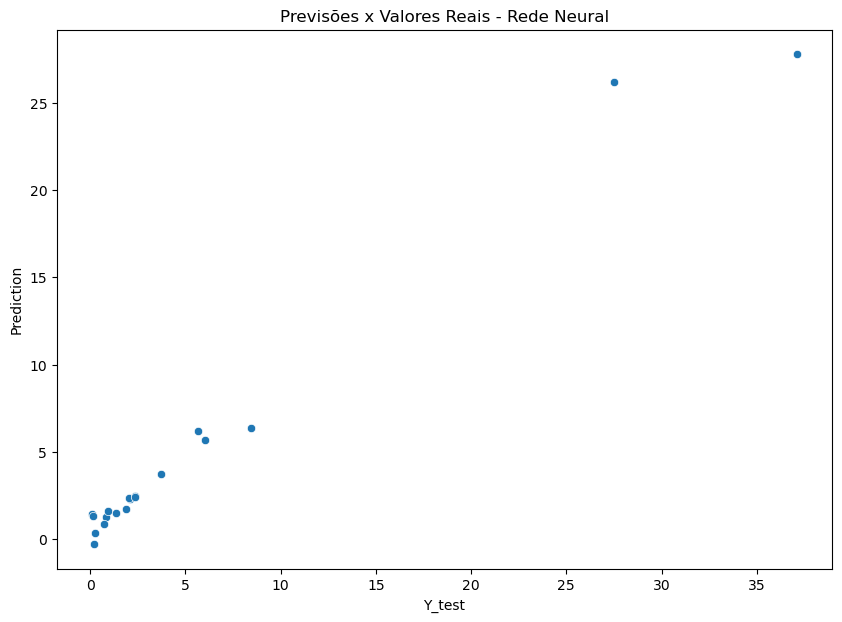

In [27]:
plt.figure(figsize=(10,7))
plt.title("Previsões x Valores Reais - Rede Neural")
sns.scatterplot(data=df_compare,x=df_compare['Y_test'], y=df_compare['Prediction'])
mae = mean_absolute_error(df_compare['Y_test'], df_compare['Prediction'])
mse = mean_squared_error(df_compare['Y_test'], df_compare['Prediction'])
r2 = r2_score(df_compare['Y_test'], df_compare['Prediction'])
display(f"MAE: {mae}", f"\nMSE: {mse}", f"\nR2: {r2}")

In [28]:
teste_predict = model2.predict(X_test_standardfin)
teste_predict = padronizadoryfin.inverse_transform(teste_predict)
df_compare = pd.DataFrame(padronizadoryfin.inverse_transform(y_test_standardfin))
df_compare.columns = ['Y_test']
df_compare['Prediction'] = teste_predict
df_compare['Diference Between Y_test and Prediction'] = df_compare['Prediction'] - df_compare['Y_test']
df_compare['Erro quadratico'] = df_compare['Diference Between Y_test and Prediction'] * df_compare['Diference Between Y_test and Prediction']
display(df_compare['Erro quadratico'].mean())
df_compare

1/1 [==============================] - 0s 62ms/step


1.5348908349321546

,Y_test,Prediction,Diference Between Y_test and Prediction,Erro quadratico
0,2.069281,1.547159,-0.522122,0.272611
1,0.810087,1.190730,0.380643,0.144889
2,3.737209,5.073852,1.336642,1.786613
3,8.459400,6.867795,-1.591606,2.533209
4,0.112082,-0.215689,-0.327771,0.107434
5,0.962997,1.817324,0.854327,0.729874
6,2.028436,1.952407,-0.076028,0.005780
7,5.662579,7.643023,1.980444,3.922157
8,0.213159,0.715835,0.502677,0.252684
9,2.374767,1.624349,-0.750417,0.563126


'MAE: 0.7915098536452201'

'\nMSE: 1.5348908349321546'

'\nR2: 0.9833167683476333'

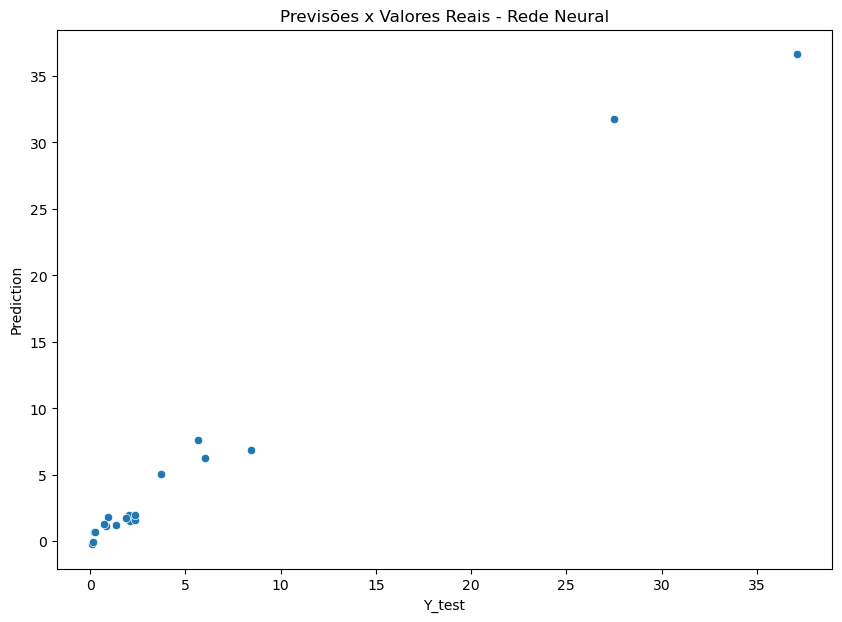

In [29]:
plt.figure(figsize=(10,7))
plt.title("Previsões x Valores Reais - Rede Neural")
sns.scatterplot(data=df_compare,x=df_compare['Y_test'], y=df_compare['Prediction'])
mae = mean_absolute_error(df_compare['Y_test'], df_compare['Prediction'])
mse = mean_squared_error(df_compare['Y_test'], df_compare['Prediction'])
r2 = r2_score(df_compare['Y_test'], df_compare['Prediction'])
display(f"MAE: {mae}", f"\nMSE: {mse}", f"\nR2: {r2}")

In [30]:
teste_predict = model3.predict(X_test_standardall)
teste_predict = padronizadoryall.inverse_transform(teste_predict)
df_compare = pd.DataFrame(padronizadoryall.inverse_transform(y_test_standardall))
df_compare.columns = ['Y_test']
df_compare['Prediction'] = teste_predict
df_compare['Diference Between Y_test and Prediction'] = df_compare['Prediction'] - df_compare['Y_test']
df_compare['Erro quadratico'] = df_compare['Diference Between Y_test and Prediction'] * df_compare['Diference Between Y_test and Prediction']
display(df_compare['Erro quadratico'].mean())
df_compare

1/1 [==============================] - 0s 62ms/step


2.03866482744877

,Y_test,Prediction,Diference Between Y_test and Prediction,Erro quadratico
0,2.069281,0.909371,-1.159910,1.345391
1,0.810087,0.331228,-0.478859,0.229306
2,3.737209,4.151865,0.414656,0.171940
3,8.459400,5.597839,-2.861561,8.188532
4,0.112082,-1.523035,-1.635118,2.673609
5,0.962997,1.188949,0.225952,0.051054
6,2.028436,1.406138,-0.622297,0.387254
7,5.662579,6.196125,0.533546,0.284671
8,0.213159,-0.806676,-1.019835,1.040063
9,2.374767,1.027690,-1.347077,1.814615


'MAE: 1.1628679856112911'

'\nMSE: 2.03866482744877'

'\nR2: 0.9778410836759192'

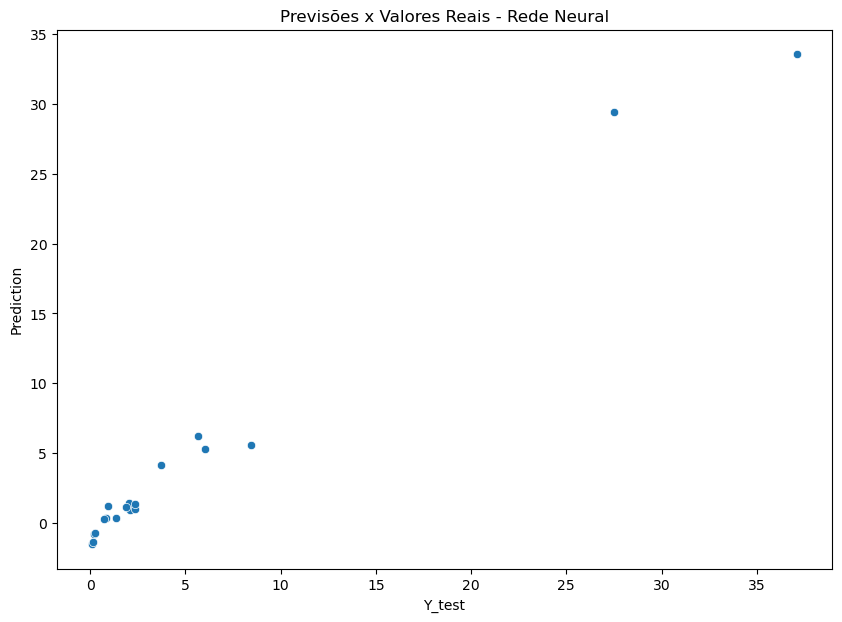

In [31]:
plt.figure(figsize=(10,7))
plt.title("Previsões x Valores Reais - Rede Neural")
sns.scatterplot(data=df_compare,x=df_compare['Y_test'], y=df_compare['Prediction'])
mae = mean_absolute_error(df_compare['Y_test'], df_compare['Prediction'])
mse = mean_squared_error(df_compare['Y_test'], df_compare['Prediction'])
r2 = r2_score(df_compare['Y_test'], df_compare['Prediction'])
display(f"MAE: {mae}", f"\nMSE: {mse}", f"\nR2: {r2}")

In [32]:
modelo_stepwisemacro = sm.OLS(y_train_standardmacro,X_train_standardmacro).fit()
modelo_stepwisefin = sm.OLS(y_train_standardfin,X_train_standardfin).fit()
modelo_stepwiseall = sm.OLS(y_train_standardall,X_train_standardall).fit()

In [33]:
modelo_stepwisemacro.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              125.4
Date:                Tue, 04 Jul 2023   Prob (F-statistic):                    4.34e-28
Time:                        02:08:48   Log-Likelihood:                         -36.797
No. Observations:                  73   AIC:                                      79.59
Df Residuals:                      70   BIC:                                      86.47
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.7070      0.440     -3.878      0.000      -2.585      -0.829
x2             1.9279      0.411      4.687      0.000       1.108       2.748
x3             0.7673      0.082      9.312      0.000       0.603       0.932
==============================================================================
Omnibus:                        0.578   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.394
Skew:                           0.180   Prob(JB):                        0.821
Kurtosis:                       2.991   Cond. No.                         20.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
modelo_stepwisefin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              704.8
Date:                Tue, 04 Jul 2023   Prob (F-statistic):                    6.39e-39
Time:                        02:08:49   Log-Likelihood:                         -17.592
No. Observations:                  73   AIC:                                      37.18
Df Residuals:                      72   BIC:                                      39.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9385      0.035     26.548      0.000       0.868       1.009
==============================================================================
Omnibus:                       40.030   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.191
Skew:                           1.463   Prob(JB):                     6.79e-43
Kurtosis:                      10.435   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
modelo_stepwiseall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                              423.9
Date:                Tue, 04 Jul 2023   Prob (F-statistic):                    3.35e-40
Time:                        02:08:49   Log-Likelihood:                         -10.953
No. Observations:                  73   AIC:                                      25.91
Df Residuals:                      71   BIC:                                      30.49
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2275      0.060      3.763      0.000       0.107       0.348
x2             0.7485      0.060     12.467      0.000       0.629       0.868
==============================================================================
Omnibus:                       31.149   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.184
Skew:                           1.141   Prob(JB):                     4.84e-27
Kurtosis:                       8.885   Cond. No.                         3.40
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
regressormacro = LinearRegression().fit(X_train_standardmacro,y_train_standardmacro)

In [37]:
teste_predict = regressormacro.predict(X_test_standardmacro)
teste_predict = padronizadorymacro.inverse_transform(teste_predict)
df_compare = pd.DataFrame(padronizadorymacro.inverse_transform(y_test_standardmacro))
df_compare.columns = ['Y_test']
df_compare['Prediction'] = teste_predict
df_compare['Diference Between Y_test and Prediction'] = df_compare['Prediction'] - df_compare['Y_test']
df_compare['Erro quadratico'] = df_compare['Diference Between Y_test and Prediction'] * df_compare['Diference Between Y_test and Prediction']
display(df_compare['Erro quadratico'].mean())
df_compare

17.897976244305266

,Y_test,Prediction,Diference Between Y_test and Prediction,Erro quadratico
0,2.069281,-1.997434,-4.066715,16.538168
1,0.810087,-1.411433,-2.221520,4.935150
2,3.737209,8.315861,4.578652,20.964053
3,8.459400,7.736607,-0.722794,0.522431
4,0.112082,-2.697913,-2.809996,7.896075
5,0.962997,-1.771571,-2.734569,7.477866
6,2.028436,-0.645600,-2.674035,7.150465
7,5.662579,9.996686,4.334107,18.784485
8,0.213159,5.970956,5.757798,33.152236
9,2.374767,-1.218355,-3.593122,12.910524


<Axes: title={'center': 'Previsões x Valores Reais - Regressão Linear Múltipla'}, xlabel='Y_test', ylabel='Prediction'>

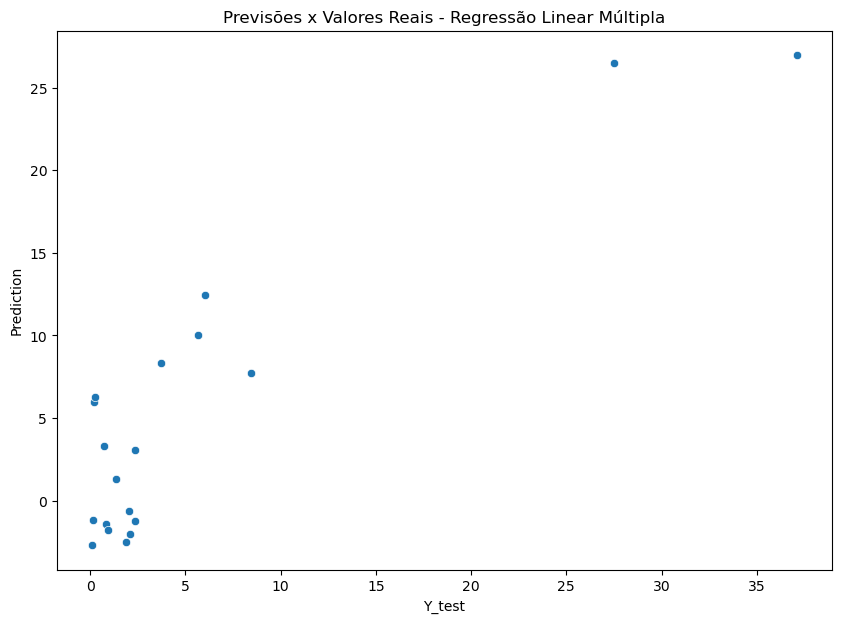

In [38]:
plt.figure(figsize=(10,7))
plt.title("Previsões x Valores Reais - Regressão Linear Múltipla")
sns.scatterplot(data=df_compare,x=df_compare['Y_test'], y=df_compare['Prediction'])

In [39]:
mae = mean_absolute_error(df_compare['Y_test'], df_compare['Prediction'])
mse = mean_squared_error(df_compare['Y_test'], df_compare['Prediction'])
r2 = r2_score(df_compare['Y_test'], df_compare['Prediction'])
display(f"MAE: {mae}", f"\nMSE: {mse}", f"\nR2: {r2}")

'MAE: 3.481599385357113'

'\nMSE: 17.897976244305266'

'\nR2: 0.8054610288910218'

In [40]:
regressorfin = LinearRegression().fit(X_train_standardfin,y_train_standardfin)

In [41]:
teste_predict = regressorfin.predict(X_test_standardfin)
teste_predict = padronizadoryfin.inverse_transform(teste_predict)
df_compare = pd.DataFrame(padronizadoryfin.inverse_transform(y_test_standardfin))
df_compare.columns = ['Y_test']
df_compare['Prediction'] = teste_predict
df_compare['Diference Between Y_test and Prediction'] = df_compare['Prediction'] - df_compare['Y_test']
df_compare['Erro quadratico'] = df_compare['Diference Between Y_test and Prediction'] * df_compare['Diference Between Y_test and Prediction']
display(df_compare['Erro quadratico'].mean())
df_compare

10.156038062801308

,Y_test,Prediction,Diference Between Y_test and Prediction,Erro quadratico
0,2.069281,1.419503,-0.649778,0.422212
1,0.810087,0.737027,-0.073060,0.005338
2,3.737209,5.622118,1.884909,3.552883
3,8.459400,7.418108,-1.041292,1.084290
4,0.112082,-2.028797,-2.140879,4.583365
5,0.962997,1.922380,0.959383,0.920415
6,2.028436,2.173818,0.145383,0.021136
7,5.662579,8.747140,3.084561,9.514519
8,0.213159,-0.196888,-0.410046,0.168138
9,2.374767,1.563182,-0.811585,0.658670


<Axes: title={'center': 'Previsões x Valores Reais - Regressão Linear Múltipla'}, xlabel='Y_test', ylabel='Prediction'>

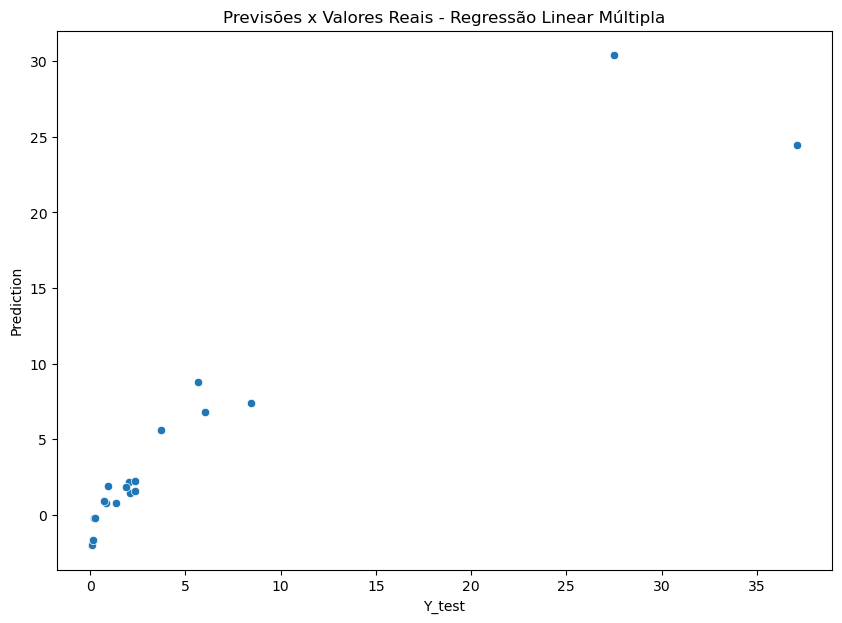

In [42]:
plt.figure(figsize=(10,7))
plt.title("Previsões x Valores Reais - Regressão Linear Múltipla")
sns.scatterplot(data=df_compare,x=df_compare['Y_test'], y=df_compare['Prediction'])

In [43]:
mae = mean_absolute_error(df_compare['Y_test'], df_compare['Prediction'])
mse = mean_squared_error(df_compare['Y_test'], df_compare['Prediction'])
r2 = r2_score(df_compare['Y_test'], df_compare['Prediction'])
display(f"MAE: {mae}", f"\nMSE: {mse}", f"\nR2: {r2}")

'MAE: 1.6151889949469882'

'\nMSE: 10.156038062801308'

'\nR2: 0.8896106929458226'

In [44]:
regressorall = LinearRegression().fit(X_train_standardall,y_train_standardall)

In [45]:
teste_predict = regressorall.predict(X_test_standardall)
teste_predict = padronizadoryall.inverse_transform(teste_predict)
df_compare = pd.DataFrame(padronizadoryall.inverse_transform(y_test_standardfin))
df_compare.columns = ['Y_test']
df_compare['Prediction'] = teste_predict
df_compare['Diference Between Y_test and Prediction'] = df_compare['Prediction'] - df_compare['Y_test']
df_compare['Erro quadratico'] = df_compare['Diference Between Y_test and Prediction'] * df_compare['Diference Between Y_test and Prediction']
display(df_compare['Erro quadratico'].mean())
df_compare

9.418191393143951

,Y_test,Prediction,Diference Between Y_test and Prediction,Erro quadratico
0,2.069281,0.226636,-1.842645,3.395339
1,0.810087,0.787868,-0.022218,0.000494
2,3.737209,4.542465,0.805256,0.648436
3,8.459400,7.949846,-0.509554,0.259646
4,0.112082,-2.578441,-2.690523,7.238913
5,0.962997,1.382185,0.419188,0.175718
6,2.028436,0.702861,-1.325575,1.757149
7,5.662579,9.115803,3.453224,11.924753
8,0.213159,1.629605,1.416446,2.006320
9,2.374767,0.070456,-2.304311,5.309848


<Axes: title={'center': 'Previsões x Valores Reais - Regressão Linear Múltipla'}, xlabel='Y_test', ylabel='Prediction'>

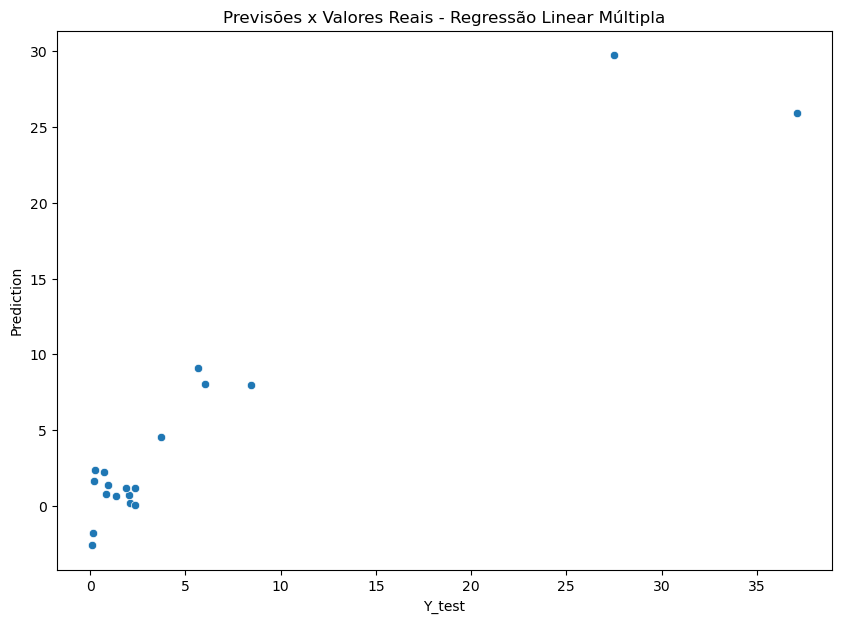

In [46]:
plt.figure(figsize=(10,7))
plt.title("Previsões x Valores Reais - Regressão Linear Múltipla")
sns.scatterplot(data=df_compare,x=df_compare['Y_test'], y=df_compare['Prediction'])

In [47]:
mae = mean_absolute_error(df_compare['Y_test'], df_compare['Prediction'])
mse = mean_squared_error(df_compare['Y_test'], df_compare['Prediction'])
r2 = r2_score(df_compare['Y_test'], df_compare['Prediction'])
display(f"MAE: {mae}", f"\nMSE: {mse}", f"\nR2: {r2}")

'MAE: 2.0116179457420706'

'\nMSE: 9.418191393143951'

'\nR2: 0.8976305902790196'